In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
df = pd.read_csv("data/project_tsibble.csv")
df.head()

,ffc_band,yearmonth(bca),Total
0,10-20,2016 Feb,1
1,10-20,2016 Mar,0
2,10-20,2016 Apr,0
3,10-20,2016 May,0
4,10-20,2016 Jun,0


In [8]:
values = df['Total'].values

# Normalise data using MinMax scaling

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values.reshape(-1, 1))

# Sequence creation for training

In [10]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 5  # Number of time steps
X, y = create_sequences(scaled_values, SEQ_LENGTH)

# Split into training and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Building the LSTM 

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

2024-08-15 04:40:05.876862: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-08-15 04:40:05.876930: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-15 04:40:05.876945: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-15 04:40:05.877244: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-15 04:40:05.877725: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Training the model

In [12]:
BATCH_SIZE = 10  # or 8
SEQ_LENGTH = 3   # Try reducing this

X, y = create_sequences(scaled_values, SEQ_LENGTH)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Rebuild model with updated parameters
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model with reduced batch size
history = model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/50


2024-08-15 04:40:19.638293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


73/73 [==============================] - 7s 42ms/step - loss: 0.0184 - val_loss: 0.0026
Epoch 2/50
73/73 [==============================] - 1s 13ms/step - loss: 0.0146 - val_loss: 0.0022
Epoch 3/50
73/73 [==============================] - 1s 13ms/step - loss: 0.0129 - val_loss: 8.8049e-04
Epoch 4/50
73/73 [==============================] - 1s 13ms/step - loss: 0.0124 - val_loss: 0.0013
Epoch 5/50
73/73 [==============================] - 1s 12ms/step - loss: 0.0121 - val_loss: 0.0011
Epoch 6/50
73/73 [==============================] - 1s 13ms/step - loss: 0.0120 - val_loss: 8.9471e-04
Epoch 7/50
73/73 [==============================] - 1s 15ms/step - loss: 0.0121 - val_loss: 0.0012
Epoch 8/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0119 - val_loss: 9.5064e-04
Epoch 9/50
73/73 [==============================] - 1s 13ms/step - loss: 0.0119 - val_loss: 0.0013
Epoch 10/50
73/73 [==============================] - 1s 13ms/step - loss: 0.0117 - val_loss: 0.0011
Epoch 11

# Testing

6/6 [==============================] - 0s 18ms/step - loss: 0.0011
Test Loss: 0.001059925532899797
6/6 [==============================] - 0s 8ms/step


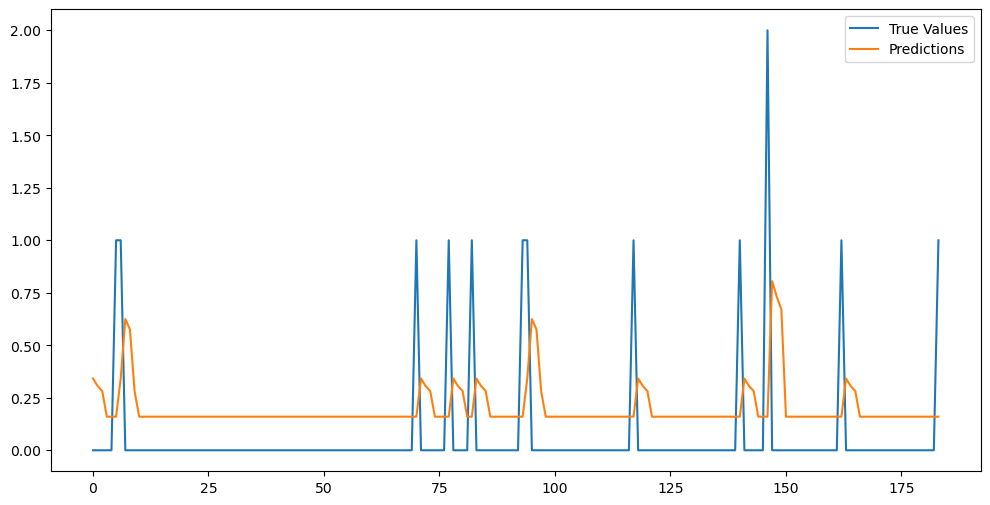

In [13]:
import matplotlib.pyplot as plt

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(X_test)

# Inverse transform to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), y_test, label='True Values')
plt.plot(np.arange(len(predictions)), predictions, label='Predictions')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions and true values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mae = mean_absolute_error(y_test_actual, predictions)
mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

6/6 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 0.8811
Mean Squared Error (MSE): 7.9376
Root Mean Squared Error (RMSE): 2.8174
